<a href="https://colab.research.google.com/github/HienNguyenMinh/PythonAssignment/blob/main/BaiTap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M5 EDA - Vẽ Các Biểu Đồ

**Tải các tệp dữ liệu từ Google Drive về Colab**

In [1]:
#Install gdown
!pip uninstall gdown -y && pip install gdown
#Tạo một folder "DataSet" trên Colab
!rm -rf /content/M5Forecasting
!mkdir M5Forecasting
#Tải các tệp dữ liệu lớn từ Google Drive
!gdown --folder https://drive.google.com/drive/folders/1YgxRFChKTJ5EHStqR_dNvJCd_2HibWll?usp=sharing -O /content/M5Forecasting


Found existing installation: gdown 4.4.0
Uninstalling gdown-4.4.0:
  Successfully uninstalled gdown-4.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14841 sha256=cfd82be855d04da5b21dab88bd6d7edbcda42777952f7a20ef1cd7d255982324
  Stored in directory: /root/.cache/pip/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown
Retrieving folder list
Processing file 1nJoIt6-nl7YOgqusRLxUZTFgOa1EmsW0 calendar.csv
Processing file 1cuEGsxjYBISrMMq8d52um_MzGTZcqyTq sales_train_evaluation.csv
Processing file 1swX4_vKU7hl6wmLQjod_EUFf3ztNgdq2 sales_train_validation.csv
Processing file 1GCf2ElYJR4Z6tBFD1BbhrvQE75wvwB1Y sample_submission.csv
Processing file 1WVPd8CnbqF65IBT2gBxLBk4yyCiJ8Psg sell_prices.csv
Retrieving 

In [2]:
# Import các thư viện cần thiết
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Kiểm tra các file dữ liệu *.csv được tải về Colab thông qua việc duyệt cây thư mục vừa được tải về Colab và in ra đường dẫn các file dữ liệu:
import os
for dirname, _, filenames in os.walk('/content/M5Forecasting'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/M5Forecasting/sales_train_evaluation.csv
/content/M5Forecasting/calendar.csv
/content/M5Forecasting/sell_prices.csv
/content/M5Forecasting/sample_submission.csv
/content/M5Forecasting/sales_train_validation.csv


In [3]:
#Đọc dữ liệu từ các file *.csv
sale2 = pd.read_csv('/content/M5Forecasting/sales_train_validation.csv')
cale4 = pd.read_csv('/content/M5Forecasting/calendar.csv')
prices = pd.read_csv('/content/M5Forecasting/sell_prices.csv')

In [4]:
#In 3 dòng dữ liệu đầu tiên trong dataframe
sale2.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


**Đổi tên các cột của sale2 (sales_train_validation)**

Tên cột d_* đổi về ngày tương ứng


In [5]:
import datetime
#Bắt đầu từ ngày 29/1/2011
x = datetime.date(2011,1,29)
#Lặp qua các cột bắt đầu từ cột thứ 6 (d_1)
for c in ((sale2.columns)[6:]):
    #Rename cột với tên lấy từ x
    sale2.rename(columns={c:x},inplace=True)
    #Tăng lên 1 ngày cho để dùng cho cột kế tiếp
    x = x + datetime.timedelta(days=1)

#In 5 dòng dữ liệu đầu tiên
sale2.head()

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


**Doanh số bán hàng của 5 item đầu tiên theo time series**

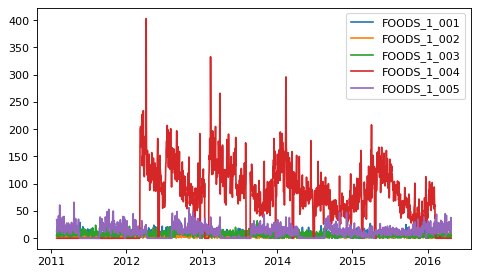

In [21]:
#Dataframe sale2: nhóm theo cột 'item_id', tính tổng doanh số hàng ngày từ cột[6] trở đến cột cuối
#Tạo dataframe sale2_temp, lấy dữ liệu đã tính toán của sale2 đổ vào sale2_temp
sale2_temp = sale2.groupby('item_id')[(sale2.columns)[6:]].sum()
#Tạo dataframe sale2_5first, lấy 5 dòng dữ liệu đầu tiên của sale2_temp
sale2_5first = sale2_temp[:5]

#Vẽ biểu đồ biểu diễn doanh số bán hàng của 5 item đầu tiên theo time series
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
#Lặp từ 0 đến 5 (len(sale2_temp.index) = 5)
for i in range(len(sale2_5first.index)):
    plt.plot(sale2_5first.iloc[i,:],label=sale2_5first.index[i])
    plt.legend(loc='best')
plt.show()


**Tổng doanh số theo time series**

In [23]:
#In 5 dòng dữ liệu đầu tiên
sale2_temp.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
item_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001,6,6,4,6,7,18,10,4,11,10,...,4,4,30,7,5,3,6,2,16,6
FOODS_1_002,4,5,7,4,3,4,1,7,2,4,...,5,9,4,1,3,5,5,3,3,1
FOODS_1_003,14,8,3,6,3,8,13,10,11,6,...,7,3,5,6,3,4,4,3,11,5
FOODS_1_004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_1_005,34,32,13,20,10,21,18,20,25,41,...,16,14,14,18,18,27,12,15,38,9


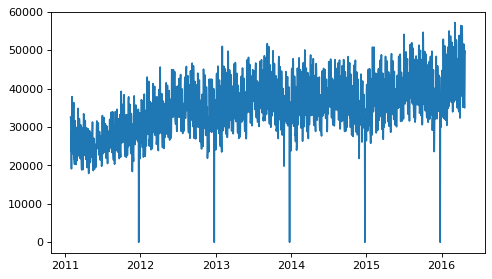

In [22]:
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
(sale2_temp.sum()).plot()
plt.show()

**Doanh số hàng tháng ở các tiểu bang khác nhau**

In [ ]:
X = sale2
X = X.groupby(X.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum()
for c in ((X.columns)[:-6]):
    x= datetime.datetime.strptime(c, '%Y-%m').date()
    X.rename(columns={c:x},inplace=True)